# FIN30150: Financial Economics 1: Group Project
Odhran Murphy 19469442
Hugo Brady xxx
Mark Mullins xxx

## Import Libraries

In [1]:
# Import the standard data analysis libraries
import pandas as pd
import numpy as np

# Plotting library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-darkgrid")

# OLS Regression Library
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import specific libraries to read in data
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import datetime
from datetime import datetime

# OS Module
import os

In [2]:
os.getcwd()

'/Users/hugobrady/OneDrive - University College Dublin/1. Final Year/Financial Economics 1/Group Project'

## Download Data

__Dateparsers for Sector ETF and Fama French data__

In [3]:
# Dateparser to read in Sector ETF data so that the pandas read data function
# recognises the date format in the first column (where dates are expressed as 29JAN1999 for 29 Jan 1999)
dateparserETF = lambda x: datetime.strptime(x, '%d%b%Y')

# Check that date parser works on a given date
print(dateparserETF('29JAN1999'))

# Dateparser to read in Fama French data so that the pandas read data function
# recognises the date format in the first column (where dates are expressed as 202009 for Sep 2020)
dateparserFF = lambda x: datetime.strptime(x, '%Y%m')

# Check that date parser works on a given date
print(dateparserFF('202009'))

1999-01-29 00:00:00
2020-09-01 00:00:00


__Set GitHub Repository__

In [4]:
base_url = 'https://raw.githubusercontent.com/odhran-murphy/FE1_Group_Project/main' 

__Read Sector ETFs data__

In [5]:
filename = 'SectorETF.csv'
df_etf = pd.read_csv(f'{base_url}/{filename}', parse_dates=['Date'], date_parser=dateparserETF)
df_etf.set_index('Date',inplace=True)
df_etf

,N/A/N,NY/AM,S&P 500,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EWPRET,VWPRET
Date,,,,,,,,,,,,,,,
1999-01-29,0.0385,0.0129,0.0428,-0.0371,NaN,-0.0656,0.0173,-0.0108,0.1590,-0.0132,-0.0248,0.0481,0.0514,0.0138,0.0495
1999-02-26,-0.0381,-0.0241,-0.0319,0.0155,NaN,-0.0086,0.0157,0.0090,-0.0992,-0.0105,-0.0276,0.0011,-0.0063,-0.0123,-0.0373
1999-03-31,0.0379,0.0285,0.0390,0.0181,NaN,0.1414,0.0325,0.0210,0.0743,-0.0011,-0.0626,0.0263,0.0487,0.0332,0.0499
1999-04-30,0.0491,0.0533,0.0376,0.2471,NaN,0.1480,0.0702,0.1504,0.0060,-0.0349,0.0966,0.0357,0.0262,0.0828,0.0520
1999-05-28,-0.0207,-0.0186,-0.0232,-0.0910,NaN,-0.0216,-0.0603,-0.0196,0.0034,-0.0104,0.0117,-0.0307,-0.0453,-0.0293,-0.0235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,-0.0208,-0.0193,-0.0161,-0.0283,-0.0246,-0.0833,-0.0471,-0.0265,-0.0154,0.0217,0.0509,-0.0059,-0.0094,-0.0159,-0.0191
2019-09-30,0.0161,0.0216,0.0188,0.0318,0.0022,0.0397,0.0455,0.0302,0.0158,0.0174,0.0424,-0.0010,0.0127,0.0260,0.0244
2019-10-31,0.0192,0.0104,0.0216,-0.0002,0.0222,-0.0209,0.0250,0.0113,0.0390,-0.0042,-0.0076,0.0513,0.0012,0.0105,0.0163


__Read Fama French data__

_3 factor monthly data_

In [6]:
filename = 'FF_data_2022_monthly.csv'
df_ff_3f = pd.read_csv(f'{base_url}/{filename}', parse_dates=['Date'], date_parser=dateparserFF)

#Offset FF data to last business day of month as it should be
df_ff_3f['Date'] = pd.DatetimeIndex(df_ff_3f['Date']) + pd.offsets.BMonthEnd(1) 
df_ff_3f.set_index('Date',inplace=True)
df_ff_3f = df_ff_3f.divide(100)

# There is a ticker called RF (Regional Finance) in the S&P500 data so I will rename RF in FF data to avoid duplicate column names
df_ff_3f.rename(columns={'RF': 'rf'}, inplace=True)

df_ff_3f

,Mkt-RF,SMB,HML,rf
Date,,,,
1926-07-30,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-29,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-05-31,-0.0034,-0.0185,0.0841,0.0003
2022-06-30,-0.0843,0.0209,-0.0597,0.0006
2022-07-29,0.0957,0.0281,-0.0410,0.0008


_5 factor monthly data_

In [7]:
filename = 'FF_data_2022_monthly_5f.csv'
df_ff_5f = pd.read_csv(f'{base_url}/{filename}', parse_dates=['Date'], date_parser=dateparserFF)

#Offset FF data to last business day of month as it should be
df_ff_5f['Date'] = pd.DatetimeIndex(df_ff_5f['Date']) + pd.offsets.BMonthEnd(1) 
df_ff_5f.set_index('Date',inplace=True)
df_ff_5f = df_ff_5f.divide(100)

# Converting all FF column names to lower case to avoid duplicates with SP500 ticker names
df_ff_5f = df_ff_5f.rename(columns=str.lower)

__SP500 and SP500 constituents data__

_Set start and end dates_

In [8]:
start = datetime(1989,12,1)
end = datetime(2022,12,31)

_Download SP500 data_

In [9]:
#Download and save dataset (Only download if data has not already been downloaded)
target = 'SP500.csv'

# # Commenting out - issue with my yfinance module I think
# if not os.path.isfile(target):
#     df_sp = pdr.get_data_yahoo('^GSPC', start, end, interval = '1mo')
#     df_sp.to_csv(target)
        
df_sp = pd.read_csv(f'{base_url}/{target}') # Always using saved dataset
df_sp.set_index('Date',inplace=True) 
df_sp_adj_close = df_sp.drop(columns=['Open','High','Low','Close','Volume'])
df_sp_adj_close.rename(columns={'Adj Close': 'S&P'}, inplace=True)
df_sp_adj_close

,S&P
Date,
1989-12-01,353.399994
1990-01-01,329.079987
1990-02-01,331.890015
1990-03-01,339.940002
1990-04-01,330.799988
...,...
2022-08-01,3955.000000
2022-09-01,3585.620117
2022-10-01,3871.979980


_Download SP500 constituents data_

In [10]:
#Download table with constituents

table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies') # reads in tables from url
df_sp500_constituents = table[0] # Table of SP500 constituents at 14th November 2022

# Table of changes of SP500 constituents since 17th June 1997 - WIP - try remove survivorship bias
df_sp500_constituents_changes = table[1] 

# Potential way to remove survivorship bias
# https://teddykoker.com/2019/05/creating-a-survivorship-bias-free-sp-500-dataset-with-python/

display(df_sp500_constituents)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [11]:
#Download and save dataset (Only download if data has not already been downloaded)
target = 'SP500_constituents_adj_close.csv'

N = len(df_sp500_constituents['Symbol'])
tickers_list = df_sp500_constituents.loc[:N,'Symbol'].tolist()

if not os.path.isfile(target):
    df_sp500_constituents_data = pdr.get_data_yahoo(tickers_list, start, end, interval = '1mo')
    set(df_sp500_constituents_data.columns.get_level_values(0))
    df_sp500_constituents_data = df_sp500_constituents_data['Adj Close']
    df_sp500_constituents_data.to_csv(target)

df_sp500_constituents_data = pd.read_csv(f'{base_url}/{target}') # Always using saved dataset
df_sp500_constituents_data.set_index('Date',inplace=True) 
df_sp500_constituents_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-01,NaN,NaN,NaN,0.250664,NaN,NaN,5.500000,1.830009,NaN,NaN,...,NaN,4.172812,4.134922,0.848284,NaN,NaN,NaN,NaN,1.845269,NaN
1990-01-01,NaN,NaN,NaN,0.241775,NaN,NaN,4.562500,1.749274,NaN,NaN,...,NaN,3.965566,3.886824,0.848284,NaN,NaN,NaN,NaN,1.752264,NaN
1990-02-01,NaN,NaN,NaN,0.241775,NaN,NaN,4.562500,1.734572,NaN,NaN,...,NaN,3.885725,3.886824,0.830972,NaN,NaN,NaN,NaN,1.853357,NaN
1990-03-01,NaN,NaN,NaN,0.287141,NaN,NaN,5.125000,1.778527,NaN,NaN,...,NaN,3.872416,3.873215,0.813661,NaN,NaN,NaN,NaN,1.836507,NaN
1990-04-01,NaN,NaN,NaN,0.280900,NaN,NaN,4.750000,1.805578,NaN,NaN,...,NaN,3.566349,3.789470,0.805004,NaN,NaN,NaN,NaN,2.014277,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,128.028427,12.99,167.152359,156.741913,133.105606,145.657196,259.279999,102.167931,45.720001,287.182892,...,60.590000,73.767395,93.914124,32.632450,90.800819,110.697227,106.082695,301.640015,54.205685,156.198105
2022-09-01,121.340004,12.04,154.960861,137.971115,132.858124,134.915085,245.660004,96.305595,45.540001,256.160858,...,63.029999,63.584019,86.612747,28.231003,87.360001,106.339996,104.316650,262.010010,50.448788,147.975571
2022-10-01,138.110977,14.18,189.919998,153.086044,144.925323,156.737976,252.080002,98.475357,57.500000,282.643097,...,63.900002,65.110001,109.925072,30.820000,102.430000,118.250000,113.349998,283.220001,51.520054,150.460297


__SP100 data__

In [12]:
#List of SP100 companies
df_sp100_constituents = pd.read_csv("SP100_list.csv", encoding="latin1")

#Download and save dataset (Only download if data has not already been downloaded)
target = 'SP100_constituents_adj_close.csv'

N = len(df_sp100_constituents['Symbol'])
tickers_list = df_sp100_constituents.loc[:N,'Symbol'].tolist()

if not os.path.isfile(target):
    df_sp100_constituents_data = pdr.get_data_yahoo(tickers_list, start, end, interval = '1mo')
    set(df_sp100_constituents_data.columns.get_level_values(0))
    df_sp100_constituents_data = df_sp100_constituents_data['Adj Close']
    df_sp100_constituents_data.to_csv(target)

df_sp100_constituents_data = pd.read_csv(f'{base_url}/{target}') # Always using saved dataset
df_sp100_constituents_data.set_index('Date',inplace=True) 
df_sp100_constituents_data

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-01,0.250664,NaN,1.830009,NaN,1.188340,105.828514,0.765221,NaN,NaN,NaN,...,0.310161,3.211169,NaN,0.872812,NaN,5.769442,1.684878,1.127023,3.515244,4.134919
1990-01-01,0.241775,NaN,1.749273,NaN,1.379061,95.194878,0.730083,NaN,NaN,NaN,...,0.236618,3.141626,NaN,0.761773,NaN,5.069331,1.491162,1.039366,3.343113,3.886824
1990-02-01,0.241775,NaN,1.734571,NaN,1.779085,99.161308,0.897964,NaN,NaN,NaN,...,0.239815,3.210266,NaN,0.761773,NaN,4.706444,1.464131,0.986440,3.450956,3.886824
1990-03-01,0.287141,NaN,1.778528,NaN,2.234883,95.194878,0.964335,NaN,NaN,NaN,...,0.249408,3.062424,NaN,0.771796,NaN,4.942092,1.539057,0.999087,3.705856,3.873216
1990-04-01,0.280900,NaN,1.805578,NaN,2.253144,91.085503,0.999473,NaN,NaN,NaN,...,0.274988,2.894433,NaN,0.812125,NaN,4.896273,1.520950,0.910560,3.897904,3.789472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,156.741898,133.105606,102.167931,287.182892,373.440002,51.444466,236.827271,252.210968,126.769997,494.959656,...,517.705566,223.254196,191.274475,45.081444,197.916306,41.117058,34.245155,43.133423,131.975220,93.914131
2022-09-01,137.971115,132.858124,96.305595,256.160858,275.200012,47.199673,223.858109,213.145813,113.000000,440.317871,...,503.460266,194.820007,160.042877,39.852745,177.253799,37.340702,31.034708,39.962620,129.699997,86.612747
2022-10-01,153.086044,144.925323,98.475357,282.643097,318.500000,57.000000,268.500641,205.690186,102.440002,470.119995,...,555.150024,197.139999,166.215149,42.450001,206.697998,36.750645,36.075378,45.695698,142.330002,109.925072


## Data Manipulation

In [13]:
# Concatenate SP500 and SP500 constituents data
df_adj_close = pd.merge(df_sp_adj_close, df_sp500_constituents_data, how = 'left', left_index=True, right_index=True)

# End of month data but recorded in Python using first day of month
df_adj_close.head()

,S&P,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-01,353.399994,NaN,NaN,NaN,0.250664,NaN,NaN,5.5000,1.830009,NaN,...,NaN,4.172812,4.134922,0.848284,NaN,NaN,NaN,NaN,1.845269,NaN
1990-01-01,329.079987,NaN,NaN,NaN,0.241775,NaN,NaN,4.5625,1.749274,NaN,...,NaN,3.965566,3.886824,0.848284,NaN,NaN,NaN,NaN,1.752264,NaN
1990-02-01,331.890015,NaN,NaN,NaN,0.241775,NaN,NaN,4.5625,1.734572,NaN,...,NaN,3.885725,3.886824,0.830972,NaN,NaN,NaN,NaN,1.853357,NaN
1990-03-01,339.940002,NaN,NaN,NaN,0.287141,NaN,NaN,5.1250,1.778527,NaN,...,NaN,3.872416,3.873215,0.813661,NaN,NaN,NaN,NaN,1.836507,NaN
1990-04-01,330.799988,NaN,NaN,NaN,0.280900,NaN,NaN,4.7500,1.805578,NaN,...,NaN,3.566349,3.789470,0.805004,NaN,NaN,NaN,NaN,2.014277,NaN


In [14]:
# Correcting data so day of month is business end of month
df_adj_close.index = pd.to_datetime(df_adj_close.index)
df_adj_close = df_adj_close.resample('M').last()
df_adj_close.head()

,S&P,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-31,353.399994,NaN,NaN,NaN,0.250664,NaN,NaN,5.5000,1.830009,NaN,...,NaN,4.172812,4.134922,0.848284,NaN,NaN,NaN,NaN,1.845269,NaN
1990-01-31,329.079987,NaN,NaN,NaN,0.241775,NaN,NaN,4.5625,1.749274,NaN,...,NaN,3.965566,3.886824,0.848284,NaN,NaN,NaN,NaN,1.752264,NaN
1990-02-28,331.890015,NaN,NaN,NaN,0.241775,NaN,NaN,4.5625,1.734572,NaN,...,NaN,3.885725,3.886824,0.830972,NaN,NaN,NaN,NaN,1.853357,NaN
1990-03-31,339.940002,NaN,NaN,NaN,0.287141,NaN,NaN,5.1250,1.778527,NaN,...,NaN,3.872416,3.873215,0.813661,NaN,NaN,NaN,NaN,1.836507,NaN
1990-04-30,330.799988,NaN,NaN,NaN,0.280900,NaN,NaN,4.7500,1.805578,NaN,...,NaN,3.566349,3.789470,0.805004,NaN,NaN,NaN,NaN,2.014277,NaN


In [15]:
# Calculating returns dataframe
df_rets = np.log(df_adj_close/df_adj_close.shift(1))
df_rets.head()

,S&P,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1989-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-31,-0.071300,NaN,NaN,NaN,-0.036106,NaN,NaN,-0.186877,-0.045120,NaN,...,NaN,-0.050942,-0.061876,0.000000,NaN,NaN,NaN,NaN,-0.051716,NaN
1990-02-28,0.008503,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-0.008440,NaN,...,NaN,-0.020339,0.000000,-0.020619,NaN,NaN,NaN,NaN,0.056089,NaN
1990-03-31,0.023966,NaN,NaN,NaN,0.171968,NaN,NaN,0.116260,0.025025,NaN,...,NaN,-0.003431,-0.003507,-0.021053,NaN,NaN,NaN,NaN,-0.009133,NaN
1990-04-30,-0.027255,NaN,NaN,NaN,-0.021978,NaN,NaN,-0.075986,0.015095,NaN,...,NaN,-0.082336,-0.021859,-0.010696,NaN,NaN,NaN,NaN,0.092395,NaN


In [16]:
# Merge 5 factor FF data and SP500 returns
df_exrets = pd.merge(df_rets,df_ff_5f, left_index = True, right_index = True)

# SP500 Excess Returns Calculation - 5 factor model
df_exrets['SPexret'] = df_exrets['S&P'] - df_exrets['rf']

df_exrets.head()

,S&P,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,ZBRA,ZION,ZTS,mkt-rf,smb,hml,rmw,cma,rf,SPexret
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,-0.071300,NaN,NaN,NaN,-0.036106,NaN,NaN,-0.186877,-0.045120,NaN,...,NaN,-0.051716,NaN,-0.0785,-0.0131,0.0085,-0.0117,0.0135,0.0057,-0.077000
1990-02-28,0.008503,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-0.008440,NaN,...,NaN,0.056089,NaN,0.0111,0.0117,0.0064,-0.0003,-0.0066,0.0057,0.002803
1990-04-30,-0.027255,NaN,NaN,NaN,-0.021978,NaN,NaN,-0.075986,0.015095,NaN,...,NaN,0.092395,NaN,-0.0336,-0.0033,-0.0259,0.0178,-0.0098,0.0069,-0.034155
1990-05-31,0.088001,NaN,NaN,NaN,0.046520,NaN,NaN,0.223144,0.121131,NaN,...,NaN,0.000000,NaN,0.0842,-0.0235,-0.0383,0.0157,-0.0168,0.0068,0.081201
1990-07-31,-0.005237,NaN,NaN,NaN,-0.063423,NaN,NaN,-0.131928,0.059189,NaN,...,NaN,0.055510,NaN,-0.0190,-0.0316,-0.0003,-0.0018,0.0321,0.0068,-0.012037


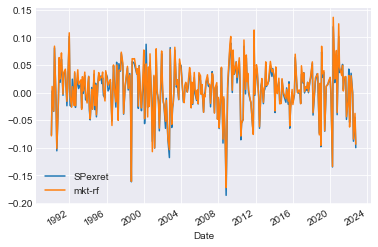

In [17]:
# Comparing SP500 excess returns to FF excess returns to check alignment
df_exrets[['SPexret', 'mkt-rf']].plot();

## 1 Factor Model

In [18]:
# Initialise betas and mean returns
beta = np.zeros(N)
mean = np.zeros(N)

In [19]:
df_exrets.dropna(axis=1, inplace = True, how='all')

x = df_exrets['SPexret']

stocks_array = df_exrets.iloc[:,df_exrets.columns.get_loc('A'):df_exrets.columns.get_loc('ZTS')+1].values
rf_array = df_exrets.loc[:,'rf'].values
rf_array = rf_array[:,np.newaxis]

y = stocks_array - rf_array # Array containing dependent variables in each column

X = sm.add_constant(x)
ts_res = sm.OLS(y, X, missing='drop').fit()
alpha  = ts_res.params[0]
beta   = ts_res.params[1:]

In [20]:
mean_exrets = np.nanmean(y, axis = 0)
mean_exrets = mean_exrets[:,np.newaxis]
mean_exrets.shape

(501, 1)

In [21]:
# If testing a 3 factor model beta will have a shape (3,501)
beta.shape

(1, 501)

In [22]:
ts_beta_mean = np.hstack((beta.T, mean_exrets))    
df_fm = pd.DataFrame(ts_beta_mean, index = df_exrets.iloc[:,df_exrets.columns.get_loc('A'):df_exrets.columns.get_loc('ZTS')+1].columns,
                    columns=['beta_m', 'mean_exrets', ])  

# Add more column names if testing multifactor model 
#columns=['beta_mkt', 'beta_col2',  'beta_col3','mean_exrets']

In [23]:
# Second pass regression for returns
modelCS = sm.OLS.from_formula('mean_exrets ~ beta_m', data=df_fm).fit()
print(modelCS.summary())
print('------------------------------------')
print('Annualised intercept', modelCS.params[0]*12)
print('Annualised risk premium', modelCS.params[1]*12)
print('Adj R-squared-adj', modelCS.rsquared_adj)

# For multifactor model
#print('Annualised risk premium', modelCS.params[2]*12)
#print('Annualised risk premium', modelCS.params[3]*12)

                            OLS Regression Results                            
Dep. Variable:            mean_exrets   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.836
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0507
Time:                        00:39:01   Log-Likelihood:                 1793.5
No. Observations:                 501   AIC:                            -3583.
Df Residuals:                     499   BIC:                            -3575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0090      0.001     16.770      0.0

## Question 1

## 3 Factor Model

In [87]:
x_3fm = df_exrets.loc[:,['SPexret', 'smb', 'hml']] 

X_3fm = sm.add_constant(x_3fm)
ts_res_3fm = sm.OLS(y, X, missing='drop').fit()

alpha_3fm  = ts_res_3fm.params[0]
betas_3fm   = ts_res_3fm.params[1:]

In [88]:
betas_3fm.shape

(3, 501)

In [89]:
ts_beta_mean_3fm = np.hstack((betas_3fm.T, mean_exrets))    
df_3fm = pd.DataFrame(ts_beta_mean_3fm, index = df_exrets.iloc[:,df_exrets.columns.get_loc('A'):df_exrets.columns.get_loc('ZTS')+1].columns,
                    columns=['beta_m', 'beta_size', 'beta_val', 'mean_exrets'])

In [90]:
# df_3fm.head()

In [91]:
# Second pass regression for returns
modelCS_3fm = sm.OLS.from_formula('mean_exrets ~ beta_m + beta_size + beta_val', data=df_3fm).fit()
print(modelCS_3fm.summary())
print('------------------------------------------------------------------------------')
print('Annualised intercept', modelCS_3fm.params[0]*12)
print('Annualised risk premium', modelCS_3fm.params[1]*12)
print('Annualised size premium', modelCS_3fm.params[2]*12)
print('Annualised value premium', modelCS_3fm.params[3]*12)
print('Adj R-squared-adj', modelCS_3fm.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:            mean_exrets   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.507
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000999
Time:                        00:51:39   Log-Likelihood:                 1799.7
No. Observations:                 501   AIC:                            -3591.
Df Residuals:                     497   BIC:                            -3575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0089      0.001     16.865      0.0

## 5 Factor Model

In [92]:
x_5fm = df_exrets.loc[:,['SPexret', 'smb', 'hml', 'rmw', 'cma']] 

X_5fm = sm.add_constant(x_5fm)
ts_res_5fm = sm.OLS(y, X_5fm, missing='drop').fit()

alpha_5fm  = ts_res_5fm.params[0]
betas_5fm  = ts_res_5fm.params[1:]

In [93]:
betas_5fm.shape

(5, 501)

In [94]:
ts_beta_mean_5fm = np.hstack((betas_5fm.T, mean_exrets))    
df_5fm = pd.DataFrame(ts_beta_mean_5fm, index = df_exrets.iloc[:,df_exrets.columns.get_loc('A'):df_exrets.columns.get_loc('ZTS')+1].columns,
                    columns=['beta_m', 'beta_size', 'beta_val','beta_prof','beta_inv', 'mean_exrets'])

In [95]:
# df_5fm.head()

In [96]:
# Second pass regression for returns
modelCS_5fm = sm.OLS.from_formula('mean_exrets ~ beta_m + beta_size + beta_val + beta_prof + beta_inv', data=df_5fm).fit()
print(modelCS_5fm.summary())
print('------------------------------------------------------------------------------')
print('Annualised intercept', modelCS_5fm.params[0]*12)
print('Annualised risk premium', modelCS_5fm.params[1]*12)
print('Annualised size premium', modelCS_5fm.params[2]*12)
print('Annualised value premium', modelCS_5fm.params[3]*12)
print('Annualised profitability premium', modelCS_5fm.params[4]*12)
print('Annualised investment premium', modelCS_5fm.params[5]*12)
print('Adj R-squared-adj', modelCS_5fm.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:            mean_exrets   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.365
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           9.64e-06
Time:                        00:51:42   Log-Likelihood:                 1807.2
No. Observations:                 501   AIC:                            -3602.
Df Residuals:                     495   BIC:                            -3577.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0099      0.001     15.893      0.0

## Question 2

## Question 3

## Project Allocation

 - Odhran Murphy: Management of GitHub repository. Question 3
 - Hugo Brady: Question 1
 - Mark Mullins: Question 2